# SVM

Support Vector Machines (SVM) is a powerful classification algorithm. 
To build an SVM model to classify 'healthy' and 'diagnosed' using the given dataset:

split the data into features (X) and target (y).

separate the dataset into training and testing sets.

train an SVM model on the training set.

evaluate the model's performance on the testing set.

In the medical field, both precision and recall are crucial, but the emphasis can vary based on the specific medical application or condition being diagnosed.

1. **Precision (Positive Predictive Value)**: It indicates the proportion of positive identifications (diagnoses) that were actually correct. A model with high precision will have fewer false positives. In a medical context, high precision ensures that the patients diagnosed with a condition actually have it. 

2. **Recall (Sensitivity or True Positive Rate)**: It indicates the proportion of actual positives that were correctly identified. A model with high recall will have fewer false negatives. In a medical context, high recall ensures that most patients with a condition are correctly diagnosed, and very few are missed.

In many medical scenarios, especially life-threatening ones, having a high recall is more critical. It's often considered more acceptable to have some false positives (which can be further verified with additional tests) than to miss a patient who actually has a condition (false negative).

For instance, consider cancer screening:
- **High Recall**: Important to ensure that very few cases of cancer are missed. A missed diagnosis can be fatal.
- **Precision**: While it's also important, in situations where the stakes are high, it might be more acceptable to have some false positives because they can undergo further tests to confirm or refute the diagnosis.

However, the ideal scenario is to have a model with both high precision and high recall. In situations where a trade-off has to be made, it's based on the potential consequences of false positives versus false negatives.



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.utils import resample




In [3]:
# Load the dataset
data = pd.read_csv('Data/colon-dataset-processed.csv')

In [4]:
# Splitting data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initializing SVM model
svm_model = SVC(kernel='linear', C=1)

In [7]:
# Training the model
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [8]:
# Predicting on the testing set
y_pred = svm_model.predict(X_test)

In [9]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8695652173913043,
 '              precision    recall  f1-score   support\n\n   diagnosed       0.85      0.92      0.88        12\n     healthy       0.90      0.82      0.86        11\n\n    accuracy                           0.87        23\n   macro avg       0.87      0.87      0.87        23\nweighted avg       0.87      0.87      0.87        23\n')

In [10]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(matrix, columns=classes, index=classes)
    plt.figure(figsize=(5,4))
    sns.heatmap(df_cm, annot=True, cmap=cmap, fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

In [11]:
# Print formatted results
print("="*50)
print("Classification Report:")
print("-"*50)
print(classification_report(y_test, y_pred))

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

   diagnosed       0.85      0.92      0.88        12
     healthy       0.90      0.82      0.86        11

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



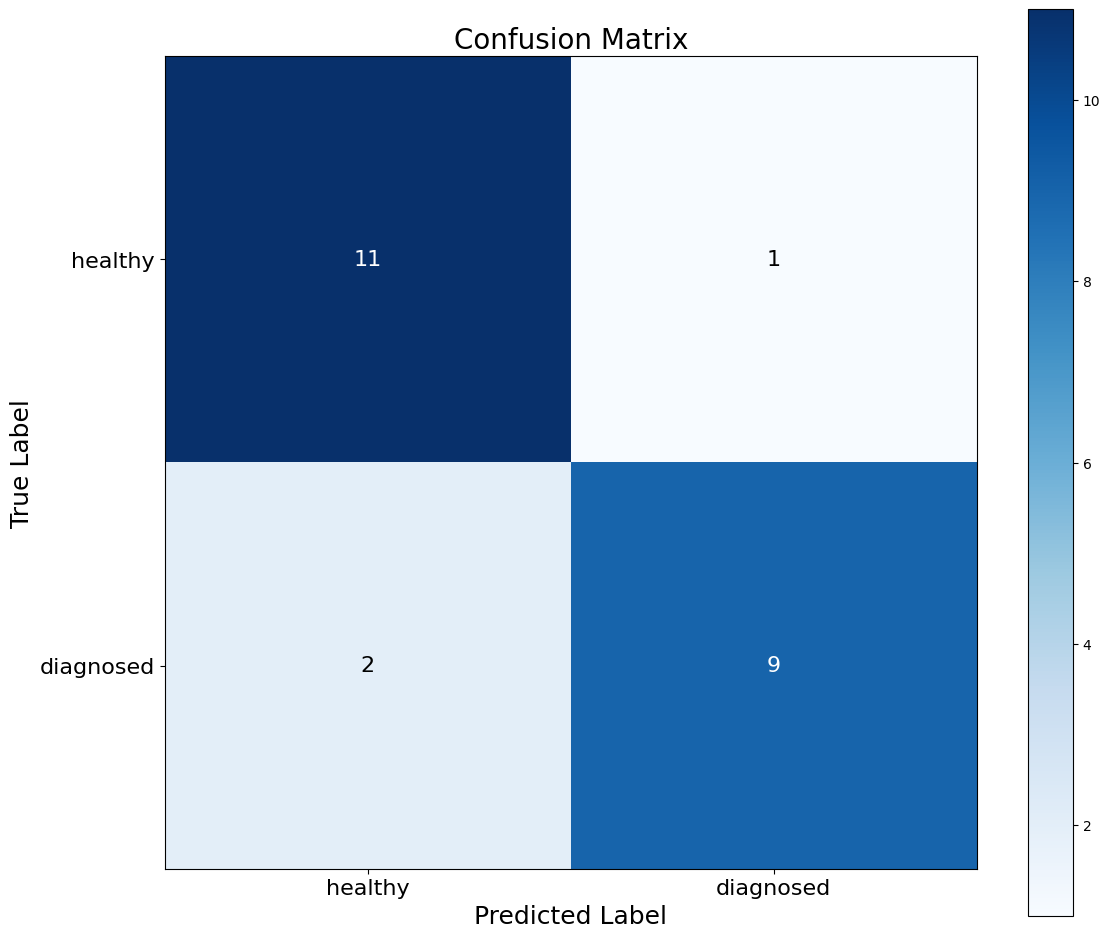

In [12]:
# Enhanced confusion matrix plotting
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the x and y ticks, labels, and title with increased font size
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()



Here are the performance metrics derived from the results of the SVM model on our dataset:

1. **Accuracy**: Approximately \(86.96\%\)
   - This implies that the SVM model correctly predicted the class (either 'healthy' or 'diagnosed') for about \(86.96\%\) of the samples in the test set.

   
2. **Precision (for 'diagnosed')**: Approximately \(84.62\%\)
   - This means that when the SVM model predicted a sample to be 'diagnosed', it was correct about \(84.62\%\) of the time. The remaining \(15.38\%\) were actually 'healthy' but misclassified.

   
3. **Recall (for 'diagnosed')**: Approximately \(91.67\%\)
   - This metric tells us that out of all the actual 'diagnosed' samples in the test set, the SVM model correctly identified \(91.67\%\) of them. The remaining \(8.33\%\) were misclassified as 'healthy'.

   
4. **F1-Score (for 'diagnosed')**: Approximately \(88.00\%\)
   - The F1-Score provides a balance between precision and recall. An F1-Score of \(88.00\%\) indicates a good harmonic balance between the two metrics for the 'diagnosed' class.

   

In summary, the SVM model performed reasonably well on the test set, with both precision and recall values being relatively high for the 'diagnosed' class. 

This suggests that the model is robust in identifying individuals with a 'diagnosed' label, as well as minimizing false alarms where 'healthy' individuals are misclassified.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Oversampling


In [13]:

# Splitting data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separate the two classes in the training data
diagnosed = X_train[y_train == 'diagnosed']
healthy = X_train[y_train == 'healthy']

# Over-sample the 'healthy' class
healthy_oversampled = resample(healthy, replace=True, n_samples=len(diagnosed), random_state=42)

# Combine the 'diagnosed' class with the oversampled 'healthy' class
X_train_oversampled = pd.concat([diagnosed, healthy_oversampled])
y_train_oversampled = ['diagnosed'] * len(diagnosed) + ['healthy'] * len(healthy_oversampled)

# Train SVM
svm = SVC(C=1, kernel='linear', gamma='scale')
svm.fit(X_train_oversampled, y_train_oversampled)

# Evaluate
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   diagnosed       1.00      0.88      0.93        16
     healthy       0.87      1.00      0.93        13

    accuracy                           0.93        29
   macro avg       0.93      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



In [ ]:
#save model
import pickle
filename='Models/SVM_Oversample_model.pkl'
pickle.dump(svm, open(filename, 'wb'))

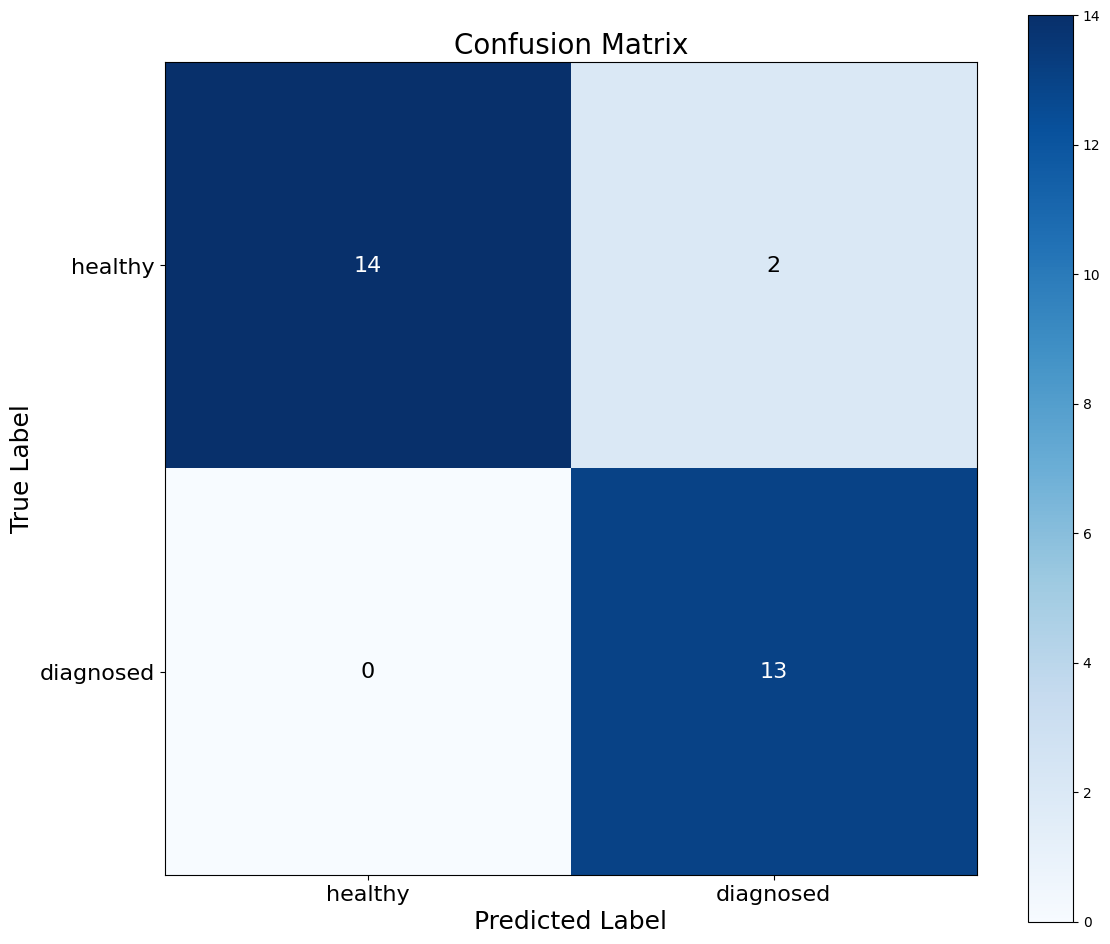

In [14]:

# Enhanced confusion matrix plotting
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the x and y ticks, labels, and title with increased font size
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()

# Undersampling

In [15]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separate the two classes in the training data
diagnosed = X_train[y_train == 'diagnosed']
healthy = X_train[y_train == 'healthy']

# Under-sample the 'diagnosed' class to match the number of 'healthy' samples
diagnosed_undersampled = resample(diagnosed, replace=False, n_samples=len(healthy), random_state=42)

# Combine the undersampled 'diagnosed' class with the 'healthy' class
X_train_undersampled = pd.concat([diagnosed_undersampled, healthy])
y_train_undersampled = ['diagnosed'] * len(diagnosed_undersampled) + ['healthy'] * len(healthy)

# Train SVM
svm = SVC(C=1, kernel='linear', gamma='scale')
svm.fit(X_train_undersampled, y_train_undersampled)

# Evaluate
y_pred_undersampled = svm.predict(X_test)
classification_results_undersampled = classification_report(y_test, y_pred_undersampled)


print(classification_results_undersampled)



              precision    recall  f1-score   support

   diagnosed       1.00      0.81      0.90        16
     healthy       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.92      0.90      0.90        29



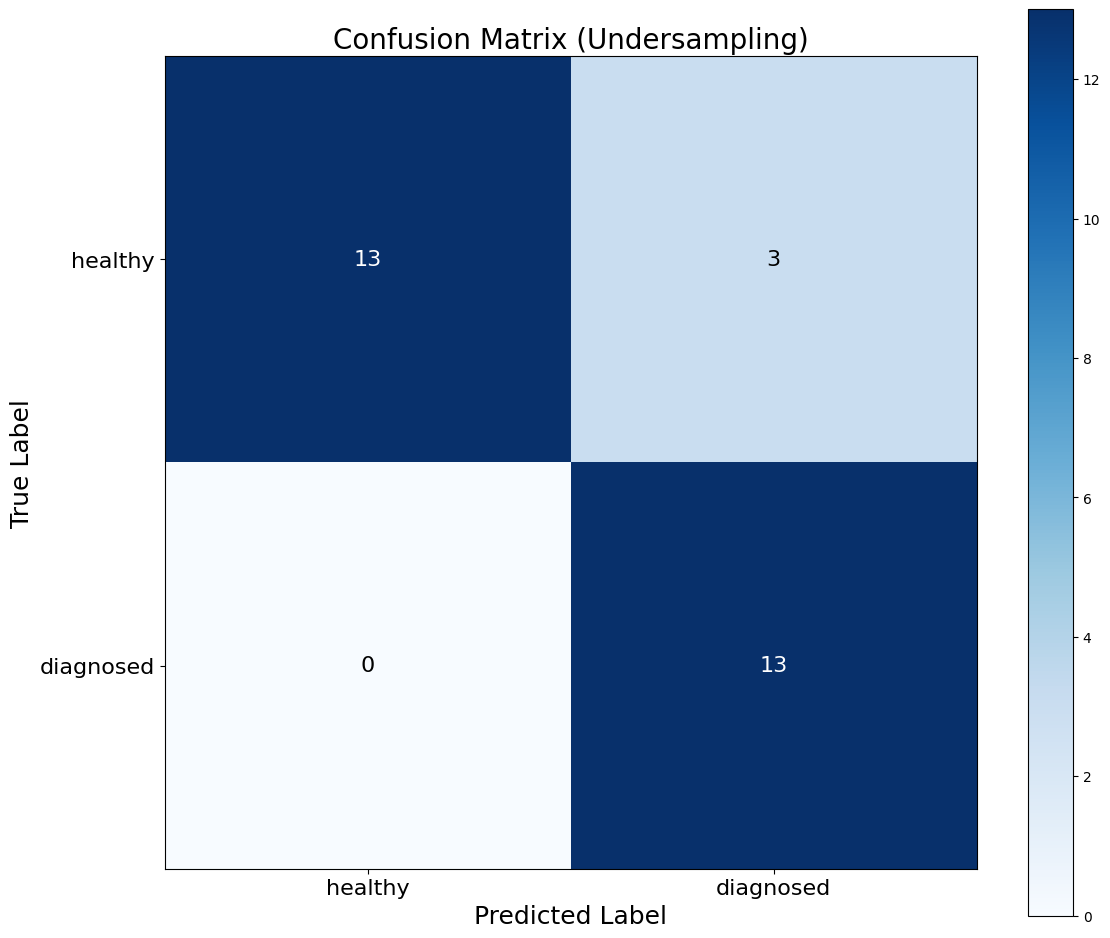

In [16]:
# Enhanced confusion matrix plotting for undersampled SVM results
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_undersampled)

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the x and y ticks, labels, and title with increased font size
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix (Undersampling)",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()
